# LSTM Regressor (for predicting future time series)

In [ ]:
# Train LSTM model using SSA data
output_file = 'data/mRNA_trajectories_example.csv'
X_train, X_val, X_test, y_train, y_val, y_test = load_and_split_data(output_file, split_val_size=0.2) # we must define split_val_size here to get a validation set
# Standardize the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Reshape input for LSTM, LSTM expects input in the shape (batch_size, seq_len, num_features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

from models.lstm import LSTMRegressor
model = LSTMRegressor(input_size=1, hidden_size=64, num_layers=2, output_size=1)
model.train_model(train_loader, val_loader)
predictions = model.predict(X_test_tensor)


✅ Running on CUDA!
Epoch [1/50], Loss: 0.5168
Validation Loss: 0.4576
Epoch [2/50], Loss: 0.4226
Validation Loss: 0.3673
Epoch [3/50], Loss: 0.3362
Validation Loss: 0.2767
Epoch [4/50], Loss: 0.2660
Validation Loss: 0.2661
Epoch [5/50], Loss: 0.2890
Validation Loss: 0.2575
Epoch [6/50], Loss: 0.2600
Validation Loss: 0.2518
Epoch [7/50], Loss: 0.2482
Validation Loss: 0.2574
No improvement (1/10).
Epoch [8/50], Loss: 0.2607
Validation Loss: 0.2576
No improvement (2/10).
Epoch [9/50], Loss: 0.2548
Validation Loss: 0.2522
No improvement (3/10).
Epoch [10/50], Loss: 0.2510
Validation Loss: 0.2505
Epoch [11/50], Loss: 0.2483
Validation Loss: 0.2511
No improvement (1/10).
Epoch [12/50], Loss: 0.2466
Validation Loss: 0.2511
No improvement (2/10).
Epoch [13/50], Loss: 0.2413
Validation Loss: 0.2509
No improvement (3/10).
Epoch [14/50], Loss: 0.2481
Validation Loss: 0.2517
No improvement (4/10).
Epoch [15/50], Loss: 0.2449
Validation Loss: 0.2526
No improvement (5/10).
Epoch [16/50], Loss: 0.243

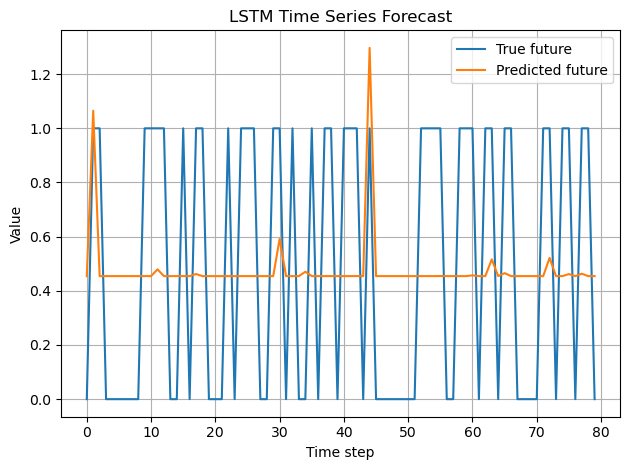

In [ ]:
import matplotlib.pyplot as plt

# Convert predictions to numpy
preds = predictions.squeeze().cpu().numpy()  # shape: (n_samples,)

plt.plot(y_test, label='True future')
plt.plot(preds, label='Predicted future')
plt.xlabel("Time step")
plt.ylabel("Value")
plt.title("LSTM Time Series Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


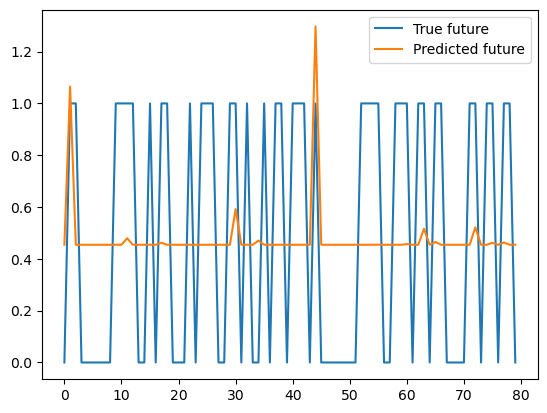

In [ ]:
plt.plot(y_test, label='True future')
plt.plot(preds, label='Predicted future')
plt.legend()
